🎯 Goal: Cluster Years based on features like smoking rate, fatalities, prescriptions

Load Data

In [23]:
import pandas as pd

df = pd.read_csv(r"D:\Unified Mentor Intership\Data Science projects\Tobacco Use and Mortality, 2004-2015\Merged_features\merged_features.csv")
X = df.drop(columns=["Year", "total_fatalities"])  # Remove ID/target columns

# Check missing values
print(X.isnull().sum())


smoking_rate                                             0
total_admissions                                         0
total_prescriptions                                      0
Tobacco Price Index                                      0
Retail Prices Index                                      0
Tobacco Price Index Relative to Retail Price Index       0
Real Households' Disposable Income                       0
Affordability of Tobacco Index                           0
Household Expenditure on Tobacco                         0
Household Expenditure Total                              0
Expenditure on Tobacco as a Percentage of Expenditure    0
smoking_rate_change                                      1
prescription_rate                                        0
fatality_ratio                                           0
dtype: int64


In [24]:
X_clean = X.dropna()


In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median'
X_clean = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


 Scale the Data

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)


KMeans Clustering

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Visualize with PCA 

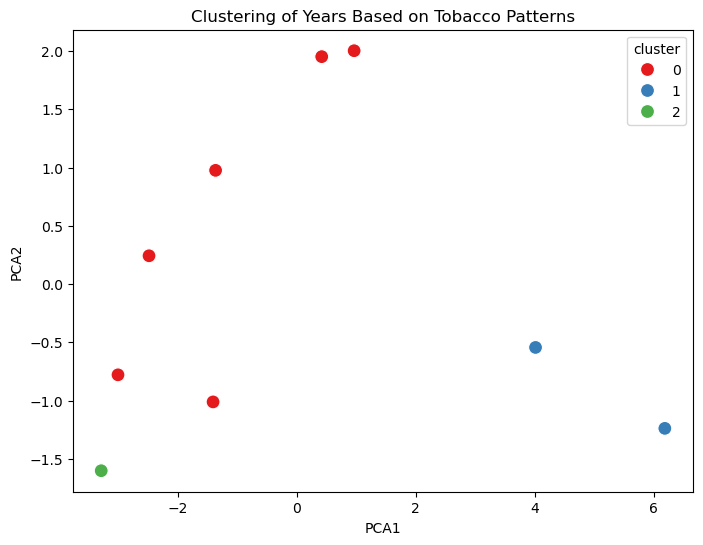

In [28]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="cluster", palette="Set1", s=100)
plt.title("Clustering of Years Based on Tobacco Patterns")
plt.show()
